In [182]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [183]:
repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_path = os.path.join(repo_root, 'predicting-proficiency', 'data')

In [184]:
file_names = [
    ('2024-09-11 District A Benchmarks.json', 'a_benchmarks_2024-09-11.json'),
    ('2024-09-11 District A Scores.json', 'a_scores_2024-09-11.json'),
    ('2024-09-11 District A Vendor Student Usage.json', 'a_vendorUsage_2024-09-11.json'),
    ('district.json', 'a_all_2024-08-29.json'),
    ('vendorProducts_202409111049.csv', 'a_vendorKey_2024-09-11.csv')
]

for old_name, new_name in file_names:
    old_path = os.path.join(data_path, 'raw', old_name)
    new_path = os.path.join(data_path, 'raw', new_name)
    if os.path.exists(old_path) and not os.path.exists(new_path):
        os.rename(old_path, new_path)

In [185]:
with open('data/raw/a_all_2024-08-29.json', 'r') as file:
    data = json.loads(file.read())

with open('data/raw/a_scores_2024-09-11.json', 'r') as file:
    scores_json = json.loads(file.read())

with open('data/raw/a_benchmarks_2024-09-11.json', 'r') as file:
    benchmarks_json = json.loads(file.read())

with open('data/raw/a_vendorUsage_2024-09-11.json', 'r') as file:
    vendorUsage_json = json.loads(file.read())

In [186]:
scores_data = scores_json[list(scores_json.keys())[0]]
scores_df = pd.DataFrame(scores_data)

benchmarks_df = pd.DataFrame(benchmarks_json['benchmarks'])
schools_df = pd.DataFrame(data['schools'])
courseSections_df = pd.DataFrame(data['courseSections'])
courseSectionRosters_df = pd.DataFrame(data['courseSectionRosters'])

vendorUsage_data = vendorUsage_json[list(vendorUsage_json.keys())[0]]
vendorUsage_df = pd.DataFrame(vendorUsage_data)

vendorKey_df = pd.read_csv('data/raw/a_vendorKey_2024-09-11.csv')

In [187]:
data_path = os.path.join(repo_root, 'predicting-proficiency', 'data')

processed_dir = os.path.join(data_path, 'processed')
if os.path.exists(processed_dir):
    for file in os.listdir(processed_dir):
        file_path = os.path.join(processed_dir, file)
        if os.path.isfile(file_path):
            os.unlink(file_path)

os.makedirs(os.path.dirname(data_path), exist_ok=True)
benchmarks_df.to_csv(os.path.join(data_path, 'processed', 'a_benchmarks_2024-09-11.csv'), index=False)
schools_df.to_csv(os.path.join(data_path, 'processed', 'a_schools_2024-08-29.csv'), index=False)
courseSections_df.to_csv(os.path.join(data_path, 'processed', 'a_courseSections_2024-08-29.csv'), index=False)
courseSectionRosters_df.to_csv(os.path.join(data_path, 'processed', 'a_courseSectionRosters_2024-08-29.csv'), index=False)
scores_df.to_csv(os.path.join(data_path, 'processed', 'a_scores_2024-09-11.csv'), index=False)
vendorUsage_df.to_csv(os.path.join(data_path, 'processed', 'a_vendorUsage_2024-09-11.csv'), index=False)

In [188]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [189]:
print(type(data))
print(data.keys())

<class 'dict'>
dict_keys(['benchmarks', 'schools', 'courseSections', 'courseSectionRosters', 'scores'])


Benchmarks

In [190]:
print(benchmarks_df.shape)
print(benchmarks_df.columns)
benchmarks_df.dtypes


(42, 5)
Index(['districtId', 'year', 'level', 'dataSource', 'value'], dtype='object')


districtId      int64
year            int64
level           int64
dataSource     object
value         float64
dtype: object

In [191]:
filtered_2017 = benchmarks_df[benchmarks_df['year'] == 2017]
print(filtered_2017)

    districtId  year  level               dataSource   value
0           45  2017      3       value_scantronMath  2356.0
1           45  2017      3    value_scantronReading  2563.0
2           45  2017      4       value_scantronMath  2493.0
3           45  2017      4    value_scantronReading  2674.0
4           45  2017      5       value_scantronMath  2584.0
5           45  2017      5    value_scantronReading  2841.0
6           45  2017      6       value_scantronMath  2675.0
7           45  2017      6    value_scantronReading  2897.0
8           45  2017      7       value_scantronMath  2766.0
9           45  2017      7    value_scantronReading  3008.0
10          45  2017      8       value_scantronMath  2823.0
11          45  2017      8    value_scantronReading  3063.0
12          45  2017     11  value_actCompositeScore    19.5


In [192]:
filtered_2018 = benchmarks_df[benchmarks_df['year'] == 2018]
print(filtered_2018)

    districtId  year  level                     dataSource   value
13          45  2018      3             value_scantronMath  2364.0
14          45  2018      3          value_scantronReading  2518.0
15          45  2018      3  value_aspireReadingScaleScore   250.0
16          45  2018      3                 value_starMath  1900.0
17          45  2018      4             value_scantronMath  2488.0
18          45  2018      4          value_scantronReading  2678.0
19          45  2018      4  value_aspireReadingScaleScore   260.0
20          45  2018      4                 value_starMath  2488.0
21          45  2018      5             value_scantronMath  2589.0
22          45  2018      5          value_scantronReading  2798.0
23          45  2018      5  value_aspireReadingScaleScore   270.0
24          45  2018      5                 value_starMath  2589.0
25          45  2018      6             value_scantronMath  2667.0
26          45  2018      6          value_scantronReading  28

In [193]:
benchmarks_df.head(12)

,districtId,year,level,dataSource,value
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0
5,45,2017,5,value_scantronReading,2841.0
6,45,2017,6,value_scantronMath,2675.0
7,45,2017,6,value_scantronReading,2897.0
8,45,2017,7,value_scantronMath,2766.0
9,45,2017,7,value_scantronReading,3008.0


In [194]:
for col in benchmarks_df.columns:
    unique_values = benchmarks_df[col].unique()
    nunique_values = benchmarks_df[col].nunique()

    print(f"Unique values in column '{col}' : {unique_values}\n")

    print(f"Number of unique values in '{col}': {nunique_values}\n")


Unique values in column 'districtId' : [45]

Number of unique values in 'districtId': 1

Unique values in column 'year' : [2017 2018]

Number of unique values in 'year': 2

Unique values in column 'level' : [ 3  4  5  6  7  8 11]

Number of unique values in 'level': 7

Unique values in column 'dataSource' : ['value_scantronMath' 'value_scantronReading' 'value_actCompositeScore'
 'value_aspireReadingScaleScore' 'value_starMath' 'value_actMathScore'
 'value_actReadingScore' 'value_actEnglishScore' 'value_actScienceScore']

Number of unique values in 'dataSource': 9

Unique values in column 'value' : [2356.  2563.  2493.  2674.  2584.  2841.  2675.  2897.  2766.  3008.
 2823.  3063.    19.5 2364.  2518.   250.  1900.  2488.  2678.   260.
 2589.  2798.   270.  2667.  2883.   275.  2743.  2954.   280.  2788.
 3019.   290.    19.1   17.    18. ]

Number of unique values in 'value': 35



In [195]:
nan_count = np.sum(benchmarks_df.isnull(), axis=0)
nan_count

districtId    0
year          0
level         0
dataSource    0
value         0
dtype: int64

In [196]:
benchmarks_df.describe(include='all')

,districtId,year,level,dataSource,value
count,42.0,42.000000,42.000000,42,42.000000
unique,NaN,NaN,NaN,9,NaN
top,NaN,NaN,NaN,value_scantronMath,NaN
freq,NaN,NaN,NaN,12,NaN
mean,45.0,2017.690476,6.285714,NaN,1955.752381
std,0.0,0.467901,2.520992,NaN,1178.295465
min,45.0,2017.000000,3.000000,NaN,17.000000
25%,45.0,2017.000000,4.000000,NaN,282.500000
50%,45.0,2018.000000,6.000000,NaN,2586.500000
75%,45.0,2018.000000,8.000000,NaN,2782.500000


<Axes: ylabel='level'>

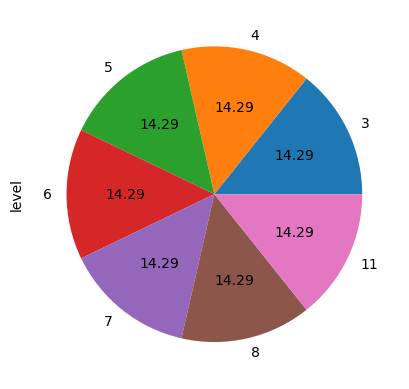

In [197]:
benchmarks_df['level'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='dataSource'>

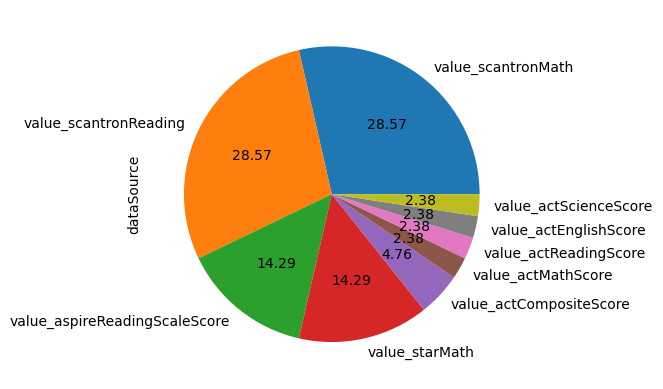

In [198]:
benchmarks_df['dataSource'].value_counts().plot.pie(autopct='%.2f')

Schools 

In [199]:
print(schools_df.shape)
print(schools_df.columns)
schools_df.dtypes

(20, 8)
Index(['id', 'name', 'districtId', 'costCenter', 'abbreviation',
       'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId'],
      dtype='object')


id                      object
name                    object
districtId              object
costCenter              object
abbreviation            object
acqRequestSelectable    object
oneRoster_sourcedId     object
oneRoster_ticketId      object
dtype: object

In [200]:
schools_df.head(20)

,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId
0,222,Elementary A,45,5,EES,1,,0
1,223,Middle School A,45,8,EMS,1,,0
2,224,High School A,45,10,ECHS,1,,0
3,225,Junior High B,45,12,ECJH,1,,0
4,226,Elementary School B,45,18,HES,1,,0
5,227,Middle School C,45,19,HMS,1,,0
6,228,High School B,45,20,HHS,1,,0
7,229,Middle School D,45,23,MJH,1,,0
8,230,Elementary School C,45,30,RSE,1,,0
9,231,Elementary School D,45,35,CES,1,,0


Seems like name, id, and district id are the only valuable thing in this data frame in relation to asking what determine proficency

In [201]:
for col in schools_df.columns:
    unique_values = schools_df[col].unique()
    nunique_values = schools_df[col].nunique()

    print(f"Unique values in column '{col}' : {unique_values}\n")

    print(f"Number of unique values in '{col}': {nunique_values}\n")

Unique values in column 'id' : ['222' '223' '224' '225' '226' '227' '228' '229' '230' '231' '232' '233'
 '234' '235' '236' '237' '238' '247' '248' '249']

Number of unique values in 'id': 20

Unique values in column 'name' : ['Elementary A' 'Middle School A' 'High School A' 'Junior High B'
 'Elementary School B' 'Middle School C' 'High School B' 'Middle School D'
 'Elementary School C' 'Elementary School D' 'Intermediate School E'
 'High School C' 'Elementary School E' 'Elementary School F'
 'High School D' 'Middle School F' 'Junior High School G'
 'Instructional Services' 'Instructional Support Services'
 'General and Administrative']

Number of unique values in 'name': 20

Unique values in column 'districtId' : ['45']

Number of unique values in 'districtId': 1

Unique values in column 'costCenter' : ['5' '8' '10' '12' '18' '19' '20' '23' '30' '35' '42' '50' '62' '65' '70'
 '75' '80' '8100' '8200' '8600']

Number of unique values in 'costCenter': 20

Unique values in column 'abbrevia

In [202]:
nan_count = np.sum(schools_df.isnull(), axis=0)
nan_count

id                      0
name                    0
districtId              0
costCenter              0
abbreviation            0
acqRequestSelectable    0
oneRoster_sourcedId     0
oneRoster_ticketId      0
dtype: int64

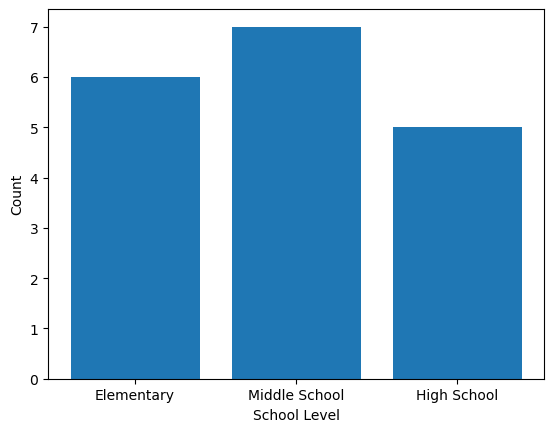

In [203]:
elem_count = schools_df['name'].str.contains('Elementary').sum()
ms_count = schools_df['name'].str.contains('Middle School|Junior High|Intermediate', case=False,regex=True).sum()
hs_count = schools_df['name'].str.contains('High School').sum()

counts = {'Elementary': elem_count, 'Middle School': ms_count, 'High School': hs_count}

plt.bar(counts.keys(), counts.values())
plt.xlabel('School Level')
plt.ylabel('Count')
plt.show()

In [204]:
school_col_drop = ['costCenter', 'abbreviation','acqRequestSelectable',	'oneRoster_sourcedId','oneRoster_ticketId']

In [205]:
schools_df.drop(school_col_drop, axis=1,inplace=True)

In [206]:
schools_df.columns

Index(['id', 'name', 'districtId'], dtype='object')

In [207]:
schools_df.describe(include='all')

,id,name,districtId
count,20,20,20
unique,20,20,1
top,222,Elementary A,45
freq,1,1,20


Course Sections

In [208]:
print(courseSections_df.shape)
print(courseSections_df.columns)
courseSections_df.dtypes

(17662, 4)
Index(['id', 'vanityId', 'year', 'schoolId'], dtype='object')


id          object
vanityId    object
year        object
schoolId    object
dtype: object

In [209]:
cols_convert = ['id', 'year', 'schoolId']
courseSections_df[cols_convert] = courseSections_df[cols_convert].astype(int)


In [210]:
courseSections_df.dtypes

id           int32
vanityId    object
year         int32
schoolId     int32
dtype: object

In [211]:
courseSections_df.head(10)

,id,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222
5,40393,MATH 4,2015,222
6,40394,SOC ST 4,2015,222
7,40395,HmroomPK6,2015,222
8,40396,READING 4,2015,222
9,40397,MATH 4,2015,222


In [212]:
courseSections_df.groupby(["vanityId", "schoolId"]).count()

id  year
vanityId     schoolId          
21st Century 223        1     1
3-D Solid I  224        2     2
             228        3     3
             233        1     1
             236        2     2
...                    ..   ...
Yearbook9-12 224        3     3
             228        5     5
             233        1     1
YrbkIII9-12  228        1     1
ZOOLOGY      233        6     6

[2284 rows x 2 columns]

In [213]:
schoolID_counts = courseSections_df['schoolId'].value_counts()

In [214]:
print(schoolID_counts)

236    2864
233    2806
228    1806
224    1376
229    1297
235    1090
231    1078
237    1031
234     912
226     868
232     697
222     676
227     577
223     572
247       4
248       4
249       4
Name: schoolId, dtype: int64


In [215]:
courseSections_df.nunique()

id          17662
vanityId     1047
year            4
schoolId       17
dtype: int64

In [216]:
courseSections_df.describe(include='all')

,id,vanityId,year,schoolId
count,17662.000000,17662,17662.000000,17662.000000
unique,NaN,1047,NaN,NaN
top,NaN,HOMEROOM,NaN,NaN
freq,NaN,817,NaN,NaN
mean,76700.258521,NaN,2016.537482,230.952610
std,26757.540364,NaN,1.102388,4.520389
min,39975.000000,NaN,2015.000000,222.000000
25%,68382.250000,NaN,2016.000000,228.000000
50%,72797.500000,NaN,2017.000000,232.000000
75%,114251.750000,NaN,2018.000000,235.000000


<Axes: ylabel='schoolId'>

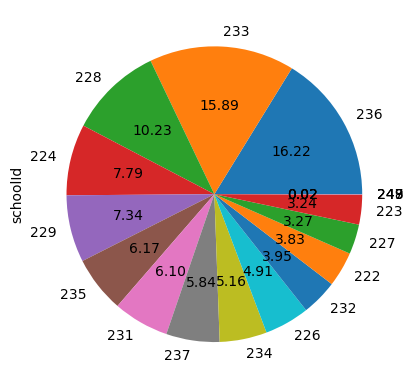

In [217]:
courseSections_df['schoolId'].value_counts().plot.pie(autopct= '%.2f')

Top 5 overrepresented 
1. (236) HS D
2. (233) HS C
3. (228) HS B
4. (224) HS A
5. (229) MS D

<Axes: ylabel='year'>

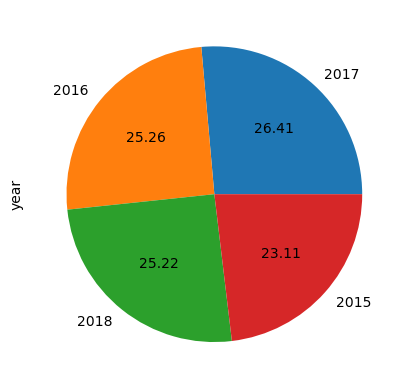

In [218]:
courseSections_df['year'].value_counts().plot.pie(autopct= '%.2f')

In [219]:
courseSections_df['year'].value_counts()

2017    4664
2016    4462
2018    4455
2015    4081
Name: year, dtype: int64

In [220]:
courseSections_df['year'].unique()

array([2015, 2017, 2016, 2018])

In [221]:
courseSections_df.dtypes

id           int32
vanityId    object
year         int32
schoolId     int32
dtype: object

Course Sections Rosters

In [222]:
print(courseSectionRosters_df.shape)
print(courseSectionRosters_df.columns)

(612241, 5)
Index(['id', 'courseSectionId', 'studentId', 'studentLevel', 'ticket'], dtype='object')


In [223]:
courseSectionRosters_df.dtypes

id                 object
courseSectionId    object
studentId          object
studentLevel       object
ticket             object
dtype: object

In [224]:
courseSectionRosters_df.head(10)

,id,courseSectionId,studentId,studentLevel,ticket
0,1047696,39975,45333,4,
1,1047704,39975,56116,4,
2,1047706,39975,45345,4,
3,1047715,39975,45400,4,
4,1047729,39975,45413,4,
5,1047738,39975,45429,4,
6,1047740,39975,56118,4,
7,1047746,39975,45438,4,
8,1047751,39975,45444,4,
9,1047752,39975,45445,4,


In [225]:
courseSectionRosters_df.nunique()

id                 612241
courseSectionId     17659
studentId           16867
studentLevel           17
ticket                  3
dtype: int64

In [226]:
for col in courseSectionRosters_df.columns:
    unique_values = courseSectionRosters_df[col].unique()
    nunique_values = courseSectionRosters_df[col].nunique()

    print(f"Unique values of '{col}': {unique_values}\n")
    print(f"Nunique values of '{col}' : {nunique_values}\n")

Unique values of 'id': ['1047696' '1047704' '1047706' ... '7254073' '7254074' '7254075']

Nunique values of 'id' : 612241

Unique values of 'courseSectionId': ['39975' '39976' '39977' ... '401683' '401684' '401685']

Nunique values of 'courseSectionId' : 17659

Unique values of 'studentId': ['45333' '56116' '45345' ... '97153' '259606' '259601']

Nunique values of 'studentId' : 16867

Unique values of 'studentLevel': ['4' '3' '2' '1' '0' '8' '5' '7' '6' '12' '10' '9' '11' '98' '99' '97'
 '96']

Nunique values of 'studentLevel' : 17

Unique values of 'ticket': ['' '0' 'RTI-Redville']

Nunique values of 'ticket' : 3



In [227]:
courseSectionRosters_df.drop(columns=['ticket'])

,id,courseSectionId,studentId,studentLevel
0,1047696,39975,45333,4
1,1047704,39975,56116,4
2,1047706,39975,45345,4
3,1047715,39975,45400,4
4,1047729,39975,45413,4
...,...,...,...,...
612236,7254071,401685,53169,4
612237,7254072,401685,53170,3
612238,7254073,401685,53286,4
612239,7254074,401685,53399,3


In [228]:
courseSectionRosters_df['studentLevel']= courseSectionRosters_df['studentLevel'].astype(float)

In [229]:
grade_level_drop = [0, 99, 98, 97,96]
courseSectionRosters_df = courseSectionRosters_df[~courseSectionRosters_df['studentLevel'].isin(grade_level_drop)]

In [230]:
courseSectionRosters_df['studentLevel'].nunique()

12

Scores

In [231]:
print(scores_df.shape)
print(scores_df.columns)

(303750, 69)
Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathSca

In [232]:
scores_df.head(10)

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,44775,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,44776,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,44776,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,44776,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,44777,6,2017,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: ylabel='year'>

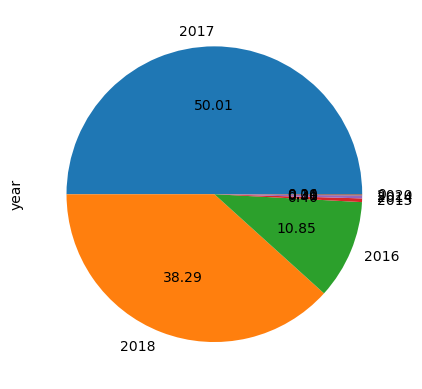

In [233]:
scores_df['year'].value_counts().plot.pie(autopct= '%.2f')

In [234]:
measure_typeID_list= scores_df['measurementTypeId'].unique().tolist()
measure_typeID_list

[6, 4, 5, 0, 3, 1, 2, 7]

In [235]:
scores_df.describe(include='all')

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
count,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,...,303750.000000,303750.000000,303750.000000,303750.0,303750.000000,303750.0,303750.0,303750.0,303750.0,303750.0
mean,131440.302008,6.004998,2017.208234,2.757402,0.320174,0.256807,0.251562,0.793995,0.000040,0.016823,...,4.174281,86.041310,26.027691,0.0,26.343312,0.0,0.0,0.0,0.0,0.0
std,57982.885934,5.916790,10.375606,1.281897,6.673339,1.104788,1.134392,3.593934,0.010887,0.128608,...,48.159151,446.624951,113.742834,0.0,113.992499,0.0,0.0,0.0,0.0,0.0
min,44774.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,85484.000000,4.000000,2017.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
50%,121078.000000,6.000000,2017.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75%,169950.000000,8.000000,2018.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,259514.000000,99.000000,2020.000000,7.000000,1000.000000,6.000000,6.000000,18.000000,3.000000,1.000000,...,1336.000000,3247.000000,820.000000,0.0,765.000000,0.0,0.0,0.0,0.0,0.0


In [236]:
for col in scores_df.columns:
    unique_values = scores_df[col].unique()
    nunique_values = scores_df[col].nunique()
    nan_count = scores_df[col].isna().sum()

    print(f"Unique values in '{col}' : {unique_values}\n")
    print(f"Nunique values in '{col}' : {nunique_values}\n")
    print(f"Number of NaN in '{col}' : {nan_count}\n")


Unique values in 'studentId' : [ 44774  44775  44776 ... 259512 259513 259514]

Nunique values in 'studentId' : 125223

Number of NaN in 'studentId' : 0

Unique values in 'studentLevel' : [ 9  8  6  7  5 12 11 10  4  3  2  1  0 99 98 97 96 -1]

Nunique values in 'studentLevel' : 18

Number of NaN in 'studentLevel' : 0

Unique values in 'year' : [2018 2017 2020 2015 2016 2014    0]

Nunique values in 'year' : 7

Number of NaN in 'year' : 0

Unique values in 'measurementTypeId' : [6 4 5 0 3 1 2 7]

Nunique values in 'measurementTypeId' : 8

Number of NaN in 'measurementTypeId' : 0

Unique values in 'subgroup_specialEd' : [   0    1    2 1000    7    6]

Nunique values in 'subgroup_specialEd' : 6

Number of NaN in 'subgroup_specialEd' : 0

Unique values in 'subgroup_lunchStatus' : [0 1 3 6 5]

Nunique values in 'subgroup_lunchStatus' : 5

Number of NaN in 'subgroup_lunchStatus' : 0

Unique values in 'subgroup_gender' : [0 4 3 6 5]

Nunique values in 'subgroup_gender' : 5

Number of NaN in

notes on the rows to drop 
year: drop all the years that are not 2017 and 2018 since they are overrep in the year and bc we have the proficency for those years


In [237]:
scores_df.dtypes

studentId               int64
studentLevel            int64
year                    int64
measurementTypeId       int64
subgroup_specialEd      int64
                        ...  
value_gcaInfo           int64
value_gcaNar            int64
value_gcaOpin           int64
value_aimsWebMath       int64
value_aimsWebReading    int64
Length: 69, dtype: object

In [238]:
scores_df = scores_df.drop(columns = [col for col in scores_df if scores_df[col].nunique() == 1])

In [239]:
scores_df.columns
scores_df.shape

(303750, 58)

In [240]:
year_drop = [2020, 2015, 2016, 2014, 0]
scores_df = scores_df[~scores_df['year'].isin(year_drop)]
scores_df['year'].unique()

array([2018, 2017], dtype=int64)

In [241]:
grade_level_drop = [0, 99, 98, 97, 96, -1]
scores_df = scores_df[~scores_df['studentLevel'].isin(grade_level_drop)]

In [242]:
scores_df['studentLevel'].unique()

array([ 9,  8,  6,  7,  5, 12, 11, 10,  4,  3,  2,  1], dtype=int64)

In [243]:
#filtered against the benchmark source 
#'value_scantronMath' 'value_scantronReading' 'value_actCompositeScore'
 #'value_aspireReadingScaleScore' 'value_starMath' 'value_actMathScore'
 #'value_actReadingScore' 'value_actEnglishScore' 'value_actScienceScore'


filtered_grades= [ 3,4,5,6,7,8,11]

In [244]:
filtered_df = scores_df[scores_df['studentLevel'].isin(filtered_grades)]

In [245]:
if 'value_aspireReadingScaleScore' in scores_df.columns:
    print("True")
else:
    print("false")

false


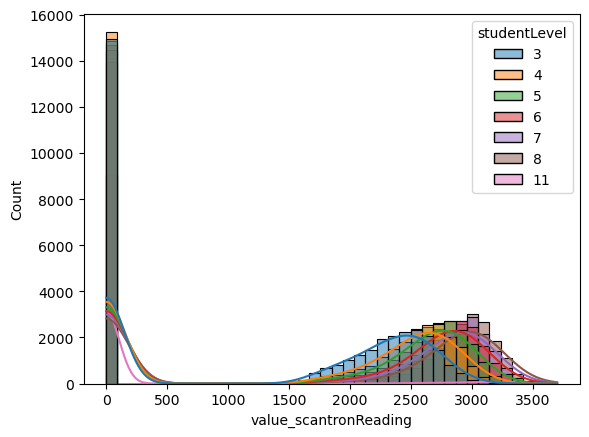

In [246]:
sns.histplot(data=filtered_df, x = 'value_scantronReading', hue = 'studentLevel', kde = True, palette='tab10')
plt.show()

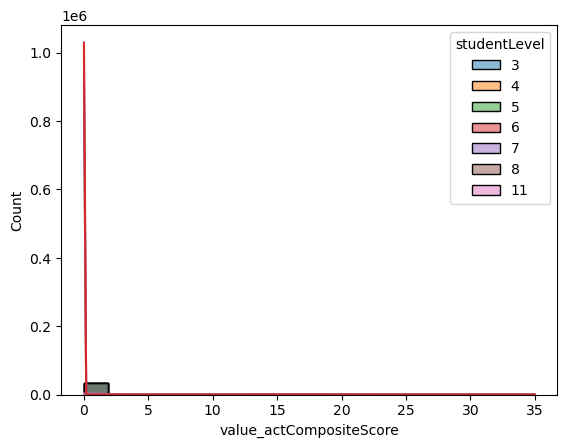

In [247]:
sns.histplot(data=filtered_df, x = 'value_actCompositeScore', hue = 'studentLevel', kde = True, palette='tab10')
plt.show()

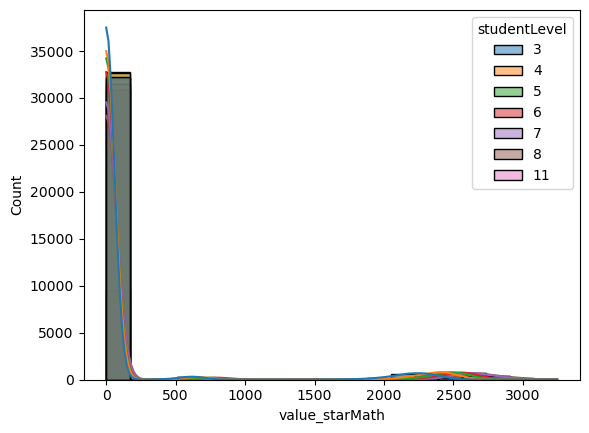

In [248]:
sns.histplot(data=filtered_df, x= 'value_starMath', hue='studentLevel', kde=True, palette='tab10')
plt.show()

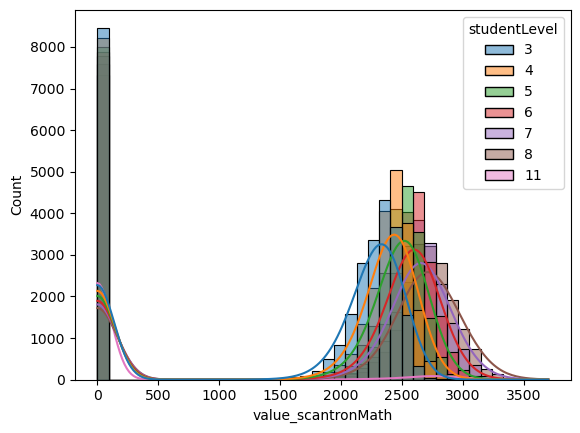

In [249]:
sns.histplot(data = filtered_df, x = 'value_scantronMath', hue = 'studentLevel', kde=True,palette='tab10')
plt.show()

In [250]:
scores_df.describe()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_accesscompositeProficiency,value_dibelsReading,value_mapHistory,value_LEAPSocSci,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_SocialMilestones
count,262328.000000,262328.000000,262328.000000,262328.000000,262328.000000,262328.000000,262328.00000,262328.000000,262328.0,262328.000000,...,262328.000000,262328.000000,262328.000000,262328.000000,262328.000000,262328.000000,262328.000000,262328.000000,262328.000000,262328.000000
mean,133118.732327,5.724166,2017.426718,2.811332,0.261741,0.246253,0.21345,0.692278,0.0,0.019479,...,0.005638,1.436629,0.571456,67.900346,87.197440,81.933755,4.827220,99.626494,30.137503,30.502962
std,59873.468414,2.539414,0.494601,1.279959,1.283530,1.066919,1.06020,3.425076,0.0,0.138203,...,0.140802,17.784123,19.251664,214.034802,194.491573,188.441966,51.774984,479.184331,121.886918,122.144317
min,44774.000000,1.000000,2017.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86699.000000,4.000000,2017.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120442.500000,6.000000,2017.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,170991.000000,8.000000,2018.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,259514.000000,12.000000,2018.000000,6.000000,7.000000,6.000000,6.00000,18.000000,0.0,1.000000,...,5.000000,499.000000,679.000000,850.000000,815.000000,775.000000,1336.000000,3247.000000,820.000000,765.000000


In [251]:
#scantron math 2017, find the students who scored = or > then the benchmark

grade3_2017math = scores_df[(scores_df['value_scantronMath'] >= 2356) & (scores_df['studentLevel'] == 3) & (scores_df['year'] == 2017)]
grade3_2017math_count = grade3_2017math['studentId'].count()
#list of studentId who are proficent in math 
grade3_2017math_prof = grade3_2017math['studentId'].tolist()
print(grade3_2017math_count)
print(grade3_2017math_prof)

4277
[50243, 50243, 50700, 50701, 50701, 50706, 50707, 50707, 50734, 50734, 50739, 50754, 50754, 50769, 50774, 50774, 50794, 50799, 50811, 50821, 50836, 50837, 50861, 50894, 50894, 50902, 50905, 50915, 50915, 50928, 50928, 51336, 51337, 51338, 51341, 51341, 51342, 51343, 51344, 51348, 51348, 51349, 51350, 51354, 51355, 51355, 51357, 51357, 51358, 51359, 51371, 51376, 51387, 51390, 51392, 51392, 51397, 51400, 51409, 51410, 51411, 51417, 51417, 51420, 51421, 51423, 51429, 51435, 51447, 51460, 51470, 51478, 51486, 51506, 51506, 51507, 51511, 51521, 51521, 51541, 51543, 51543, 51548, 51561, 51576, 51576, 51581, 51581, 51602, 51613, 51643, 51656, 51675, 51751, 51759, 51775, 51826, 51882, 51892, 51892, 51902, 51916, 51929, 51944, 51946, 51951, 51955, 51972, 52001, 52016, 52023, 52029, 52065, 52090, 52112, 52112, 52134, 52152, 52152, 52154, 52154, 52155, 52156, 52163, 52164, 52165, 52165, 52167, 52170, 52170, 52171, 52171, 52173, 52173, 52175, 52180, 52184, 52187, 52188, 52192, 52194, 52203, 

In [252]:
#Scantron Reading grade 3, 2017
grade3_2017read = scores_df[(scores_df['value_scantronReading'] >= 2563) & scores_df['studentLevel'] & (scores_df['year'] == 2017)]
grade3_2017read_count = grade3_2017read['studentId'].count()
grade3_2017read_prof = grade3_2017read['studentId'].tolist()
print(grade3_2017read_count)
print(grade3_2017read_prof)

21969
[44784, 44784, 44815, 44815, 44829, 44830, 44830, 44831, 44831, 44845, 44845, 44847, 44847, 44848, 44848, 44861, 44861, 44885, 44885, 44890, 44890, 44897, 44914, 44915, 44915, 44920, 44925, 44925, 44936, 44943, 44943, 44944, 44944, 44945, 44945, 44946, 44946, 44947, 44947, 44949, 44949, 44950, 44950, 44951, 44951, 44952, 44952, 44953, 44953, 44954, 44954, 44955, 44955, 44956, 44956, 44957, 44957, 44958, 44958, 44959, 44959, 44960, 44960, 44962, 44962, 44963, 44963, 44964, 44964, 44966, 44966, 44967, 44967, 44968, 44968, 44969, 44969, 44970, 44971, 44971, 44972, 44972, 44974, 44974, 44975, 44975, 44977, 44978, 44978, 44979, 44979, 44980, 44980, 44981, 44981, 44982, 44982, 44983, 44984, 44984, 44985, 44985, 44986, 44987, 44987, 44988, 44988, 44989, 44989, 44990, 44990, 44992, 44992, 44993, 44993, 44994, 44994, 44995, 44995, 44996, 44996, 44998, 44998, 44999, 44999, 45000, 45000, 45001, 45001, 45002, 45002, 45003, 45004, 45004, 45005, 45005, 45006, 45007, 45007, 45008, 45008, 45009,

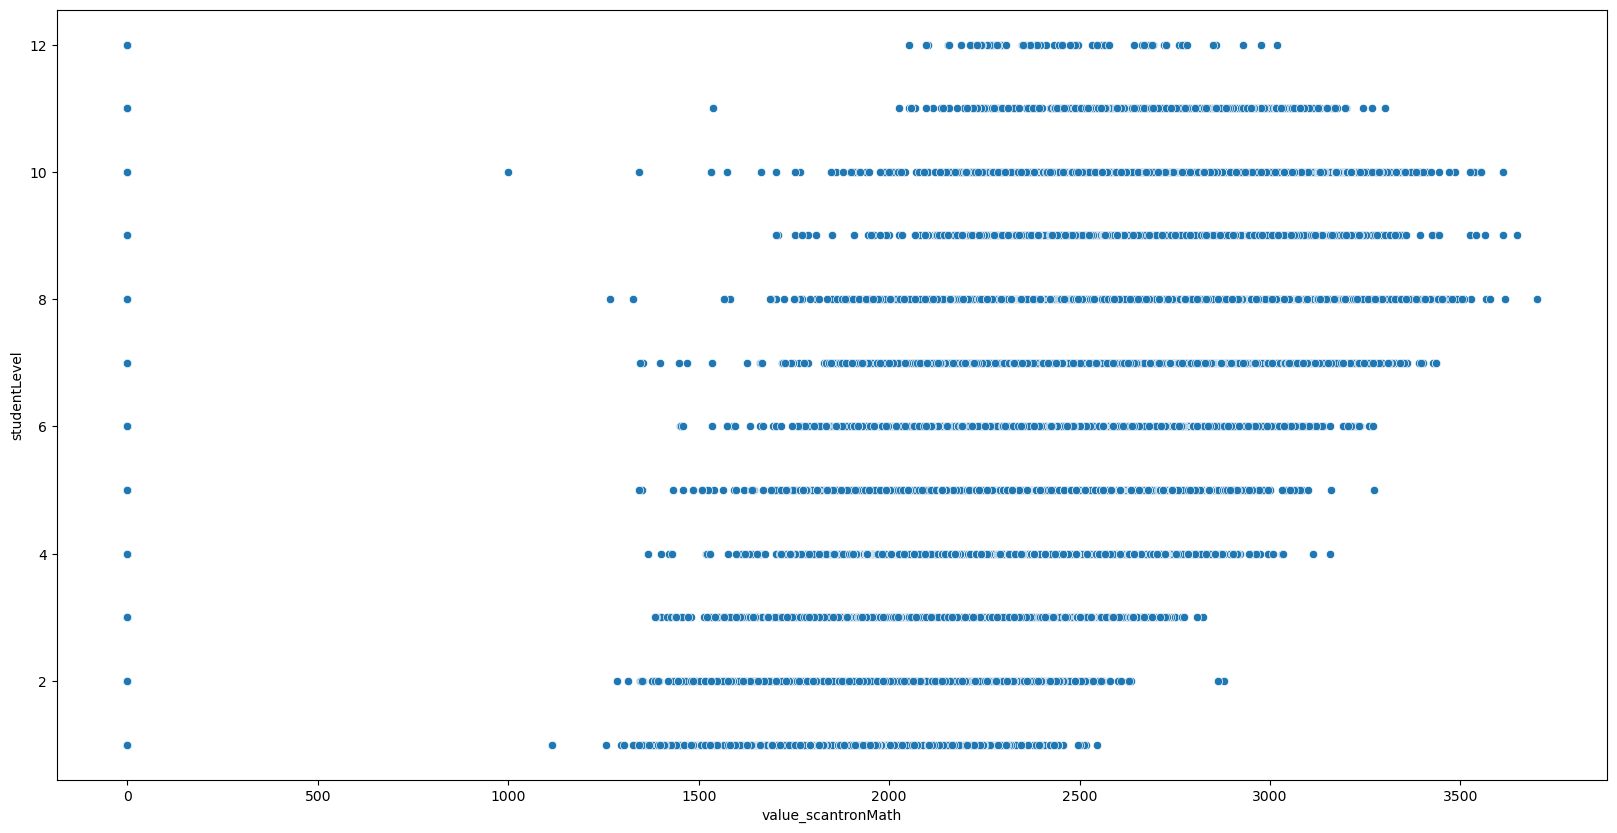

In [253]:
#all the grade levels (1-12), shows all the data from 2014-2018,2020
plt.figure(figsize=(20,10))
sns.scatterplot(data=scores_df, x ='value_scantronMath', y ='studentLevel' )
plt.show()

In [258]:
#find the studentId who are profienct in math and reading
grade3_2017both_prof = [student_id for student_id in grade3_2017math_prof if student_id in grade3_2017read_prof]
grade3_2017count = len(grade3_2017both_prof)
print(grade3_2017count)

3041


Vender usage

In [259]:
vendorUsage_df.shape
vendorUsage_df.columns
vendorUsage_df.dtypes

id                    int64
vendorId              int64
studentId             int64
active                int64
year                  int64
usageTypeId           int64
weeklyUsageMinutes    int64
dtype: object

In [261]:
vendorUsage_df.head()

,id,vendorId,studentId,active,year,usageTypeId,weeklyUsageMinutes
0,11890,72609,44777,0,2018,1,0
1,11891,72609,44783,0,2018,1,0
2,11892,72609,44784,0,2018,1,0
3,11893,72609,44807,0,2018,1,0
4,11894,72609,44809,0,2018,1,0
